In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
df = yf.download('AAPL', start = '2012-01-01', end='2023-01-01')
df.head()

D:\annaconda-python\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751296,394024400


In [2]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142456,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725311,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.043121,77034200


In [3]:
df = df.reset_index()

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751296,394024400


In [5]:
columns_to_drop = ['Date', 'Adj Close']
df = df.drop(columns_to_drop, axis=1)

In [6]:
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


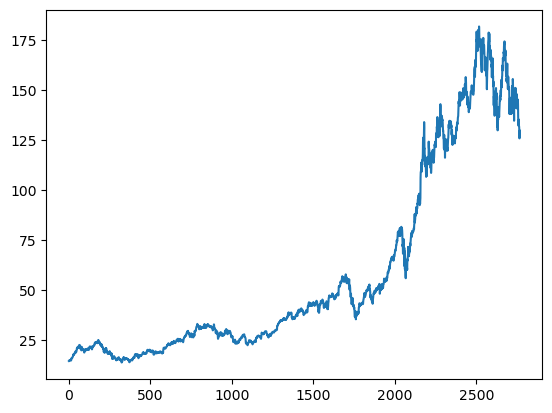

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df['Close'].rolling(100).mean()

In [9]:
ma200=df['Close'].rolling(200).mean()

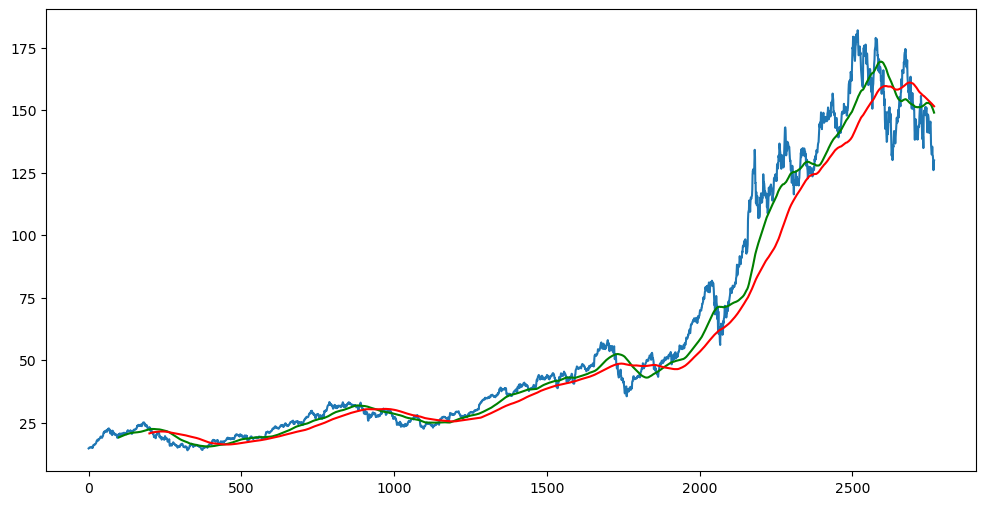

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [11]:
df['Close']

0        14.686786
1        14.765714
2        14.929643
3        15.085714
4        15.061786
           ...    
2763    131.860001
2764    130.029999
2765    126.040001
2766    129.610001
2767    129.929993
Name: Close, Length: 2768, dtype: float64

## Splitting data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
split_index = int(len(df) * 0.7)

In [14]:
train_data = df.Close[:split_index]
test_data = df.Close[split_index:]
train_data

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1932    53.542500
1933    54.174999
1934    55.897499
1935    55.772499
1936    54.687500
Name: Close, Length: 1937, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train_data' is a pandas Series containing the column you want to scale

# Convert the Series to a NumPy array and reshape it to a 2D array
train_data_array = train_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
scaled_train_data = scaler.fit_transform(train_data_array)

# Inverse transform to get the original data (if needed)
# original_data = scaler.inverse_transform(scaled_data)

# Print the scaled data
scaled_train_data.shape # Flatten the 2D array to 1D for printing



(1937, 1)

In [16]:
x_train = []
y_train = []
i=0
for i in range (i,scaled_train_data.shape[0]-100):
    x_train.append(scaled_train_data[i:i+100])
    y_train.append(scaled_train_data[i+100,0])
x_train,y_train =np.array(x_train),np.array(y_train)

In [17]:
y_train.shape

(1837,)

## ML MODEL

In [18]:
from keras.layers import Dense,Dropout,LSTM

In [19]:
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50

58/58 [==============================] - 16s 180ms/step - loss: 0.0502
Epoch 2/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0098
Epoch 3/50
58/58 [==============================] - 10s 178ms/step - loss: 0.0073
Epoch 4/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0069
Epoch 5/50
58/58 [==============================] - 10s 177ms/step - loss: 0.0061
Epoch 6/50
58/58 [==============================] - 17s 289ms/step - loss: 0.0062
Epoch 7/50
58/58 [==============================] - 16s 271ms/step - loss: 0.0061
Epoch 8/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0071
Epoch 9/50
58/58 [==============================] - 9s 157ms/step - loss: 0.0050
Epoch 10/50
58/58 [==============================] - 11s 192ms/step - loss: 0.0049
Epoch 11/50
58/58 [==============================] - 11s 170ms/step - loss: 0.0049
Epoch 12/50
58/58 [==============================] - 10s 164ms/step - loss: 0.0044
Epoch 13/50
5

In [24]:
model.save('keras_model.h5')

D:\annaconda-python\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
past100=train_data.tail(100).values

In [26]:
past100

array([51.79000092, 51.31999969, 51.07500076, 51.15250015, 50.16749954,
       52.63000107, 52.28749847, 52.9375    , 52.11999893, 50.71500015,
       50.72499847, 50.18000031, 49.29499817, 46.43000031, 47.16500092,
       47.72999954, 47.52000046, 47.25      , 45.77249908, 46.65000153,
       45.69499969, 44.91500092, 44.74250031, 44.55749893, 44.34500122,
       44.57500076, 43.76750183, 43.32500076, 44.90999985, 45.63499832,
       46.30500031, 47.53749847, 48.14500046, 48.70249939, 48.54750061,
       48.53749847, 48.18500137, 48.47249985, 49.61249924, 49.46749878,
       49.86500168, 49.69499969, 49.64500046, 48.89250183, 49.95000076,
       49.93500137, 49.47999954, 50.38750076, 50.68249893, 51.10250092,
       51.05749893, 50.00500107, 50.31000137, 50.80749893, 50.4375    ,
       50.82500076, 51.30250168, 51.125     , 50.83750153, 51.41500092,
       50.64749908, 51.80500031, 52.20999908, 52.16749954, 51.75500107,
       51.93500137, 52.41999817, 52.19499969, 53.25999832, 52.10

In [27]:
test_data_array = test_data.values.reshape(-1, 1)
test_data_array
past100 = past100.reshape(-1, 1)

In [28]:
newtest_data_array = np.concatenate((test_data_array, past100))
newtest_data_array.shape

(931, 1)

In [29]:
final_test_data = scaler.fit_transform(newtest_data_array)
final_test_data_list = final_test_data.tolist()

In [30]:
x_test = []
y_test = []
i=0

In [31]:
for i in range(0, final_test_data.shape[0] - 100):
    x_test.append(final_test_data_list[i:i + 100])
    y_test.append(final_test_data_list[i + 100][0])

In [32]:
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test.shape

(831,)

In [33]:
y_predict=model.predict(x_test)

26/26 [==============================] - 2s 53ms/step


In [34]:
y_predict.shape

(831, 1)

In [56]:
scale_value=1/scaler.scale_[0]
y_predict=y_predict * scale_value
y_test=y_test * scale_value

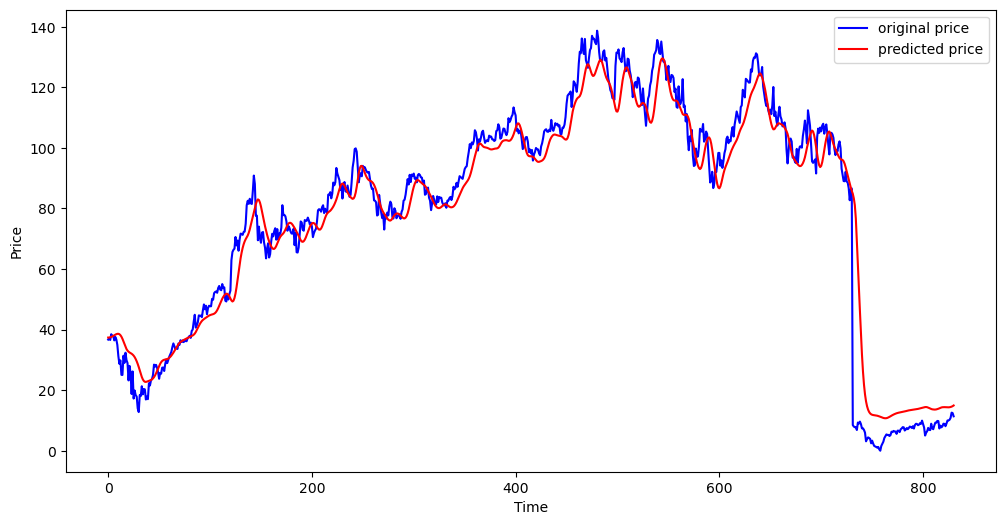

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predict,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()